## Softmax Activation

In [9]:
# Exponential function
# y = e^x

# Euler's number
e = 2.718281828459045

# Where exponentiating to convert negatives to positives without loosing the meaning of negative values.
outputs = [4.8, 1.21, -2.385]
for i, value in enumerate(outputs):
    outputs[i] = e ** value

print(outputs)

[121.51041751873483, 3.353484652549023, 10.859062664920513]


In [10]:
# Normalization - produces a probability distribution where each value is divided by the sum of all the values.
normBase = sum(outputs)
normOutputs = outputs

for i, value in enumerate(outputs):
    normOutputs[i] = value / normBase

print(normOutputs)
print(sum(normOutputs))

[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


In [21]:
import numpy as np

# Input -> Exponentiate -> Normalize -> Output

outputs = [[4.8, 1.21, -2.385], 
           [8.9, -1.81, 0.2], 
           [1.41, 1.051, 0.026]]

expValues = np.exp(outputs)
normValues = expValues / np.sum(expValues, 
                                axis=1, # calculates the sum at dimension 1 or for each feature vector. 
                                keepdims=True) # keeps the same dimension as outputs

print(normValues)
print(np.sum(normValues, axis=1))

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]
[1. 1. 1.]


In [22]:
# Overflow prevention
# v = u - max u
np.max(outputs, axis=1, keepdims=True)

array([[4.8 ],
       [8.9 ],
       [1.41]])

## Calculating Loss with Categorical Cross-Entropy

In [24]:
import math

# Natural logarithm
# y = loge(x) = ln(x)

# logarithm -> solves for x
# e ** x = b

b = 5.2
print(np.log(b))
print(math.e ** 1.6486586255873816)

1.6486586255873816
5.199999999999999


In [34]:
softmaxOutput = [0.7, 0.1, 0.2]
targetOutput = [1, 0, 0]

loss = -(math.log(softmaxOutput[0]) * targetOutput[0] + 
         math.log(softmaxOutput[1]) * targetOutput[1] + 
         math.log(softmaxOutput[2]) * targetOutput[2])
print(loss)

loss = -(math.log(softmaxOutput[0]))
print(loss)

print(-(math.log(0.5)))

0.35667494393873245
0.35667494393873245
0.6931471805599453


softmaxOutput = np.array([[0.7, 0.1, 0.2], 
                          [0.1, 0.5, 0.4],
                          [0.02, 0.9, 0.08]])
classTarget = [0, 1, 1]

print(softmaxOutput[range(len(softmaxOutput)), classTarget])
negLog = -np.log(softmaxOutput[range(len(softmaxOutput)), classTarget])
print(negLog)
averageLoss = np.mean(negLog)
print(averageLoss)

## Optimization

### Derivatives

4.0001999999987845


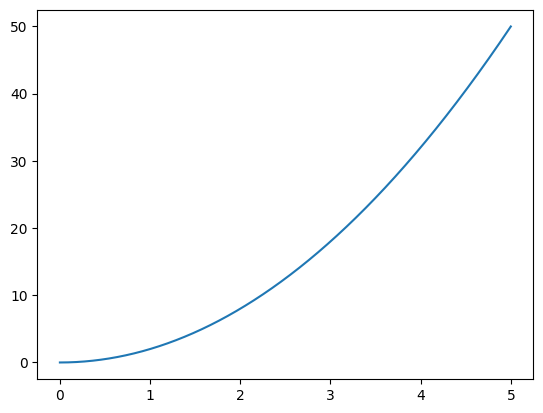

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def f(x): return 2*x**2

x = np.arange(0, 5, 0.001)
y = f(x)

p2_delta = 0.0001

x1 = 1
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

approximateDerivative = (y2 - y1) / (x2 - x1)
print(approximateDerivative)

plt.plot(x, y)
plt.show()


### Gradients, Partial Derivatives and the Chain Rule

**partial derivative** - measures how much impact a single input has on a function's output.

**gradient** - a vector of the size of inputs containing partial derivative solutions with respect to each of the inputs. Denoted using the nambla symbol.

### Backpropagation

In [12]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

print(xw0, xw1, xw2, b)

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print(z)

# ReLU activation function
y = max(z, 0)
print(y)

# Backward pass

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0)
print(drelu_dz)

# Partial derivatives of the multiplication, the chain rule
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1

drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db

print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)

-3.0 2.0 6.0 1.0
6.0
6.0
1.0
1.0 1.0 1.0 1.0
